# 0. Import libraries

In [1]:
from constants import DATA_FOLDER_PATH

from modeling import load_model, \
                     read_data_for_training, \
                     predict_zernike_coefficients

from plot_surfaces import plot_surface_from_zernike_coefficients

2023-09-27 16:12:13.475779: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-27 16:12:14.012957: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# 1. Define model to evaluate

In [2]:
MODEL_NAME = "BigLinearModel"

FEATURES_FILENAME = "surfaces_linear.npy"
LABELS_FILENAME = "coefficients_linear.npy"
FEATURES_FILE_PATH = f"{DATA_FOLDER_PATH}/{FEATURES_FILENAME}"
LABELS_FILE_PATH = f"{DATA_FOLDER_PATH}/{LABELS_FILENAME}"

# 2. Load model

In [3]:
surface_reconstructor = load_model(MODEL_NAME)

2023-09-27 16:12:14.824335: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-27 16:12:14.842963: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-27 16:12:14.843142: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

# 3. Load data

In [4]:
train_features, \
train_labels, \
val_features, \
val_labels, \
test_features, \
test_labels = read_data_for_training(FEATURES_FILE_PATH,
                                     LABELS_FILE_PATH)

# 4. Select random point from test

In [5]:
surface_id = 0
test_surface = test_features[surface_id]
test_surface_coeffs = test_labels[surface_id]

# 5. Predict and compare

In [7]:
test_surface_predicted_coeffs = predict_zernike_coefficients(surface_reconstructor,
                                                             test_surface)

1/1 [==============================] - 1s 798ms/step


2023-09-27 16:12:42.263979: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


### Original Surface

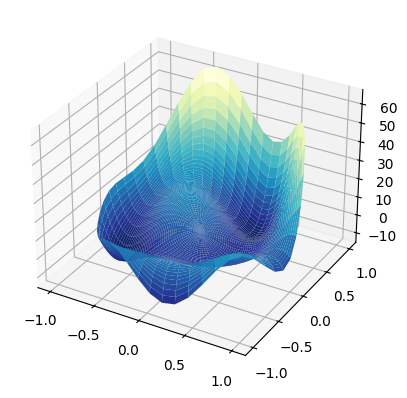

In [8]:
plot_surface_from_zernike_coefficients(test_surface_coeffs, True)

### Reconstructed Surface

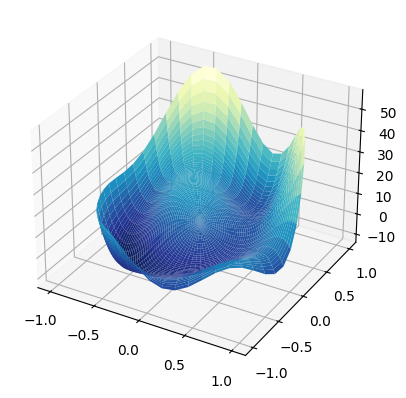

In [9]:
plot_surface_from_zernike_coefficients(test_surface_predicted_coeffs, True)